In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [4]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11490434/11490434 [==============================] - 5s 0us/step


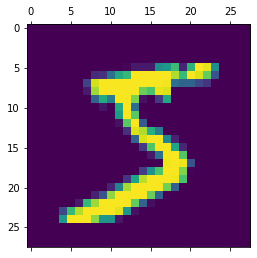

In [33]:
plt.matshow(x_train[0])

In [27]:
x_train=x_train/255
x_test=x_test/255

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6234 - accuracy: 0.8443 - val_loss: 0.3466 - val_accuracy: 0.9045
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3286 - accuracy: 0.9079 - val_loss: 0.2895 - val_accuracy: 0.9205
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2811 - accuracy: 0.9208 - val_loss: 0.2552 - val_accuracy: 0.9286
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2510 - accuracy: 0.9292 - val_loss: 0.2308 - val_accuracy: 0.9350
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2284 - accuracy: 0.9363 - val_loss: 0.2134 - val_accuracy: 0.9387
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2104 - accuracy: 0.9414 - val_loss: 0.1987 - val_accuracy: 0.9431
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1955 - accuracy: 0.9460 - val_loss: 0.1850 - val_ac

In [12]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.1597 - accuracy: 0.9543
Loss=0.160
Accuracy=0.954


<function matplotlib.pyplot.show(close=None, block=None)>

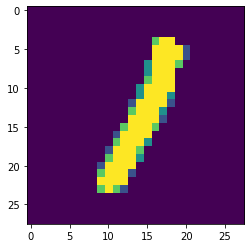

In [13]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [14]:
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict,axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print('confusion matrix of the test set :\n', confusion_matrix)

313/313 [==============================] - 2s 5ms/step
confusion matrix of the test set :
 tf.Tensor(
[[ 966    0    1    1    0    4    6    1    1    0]
 [   0 1116    3    2    0    1    4    1    8    0]
 [   9    2  986    7    6    2    6    5    6    3]
 [   0    0   13  963    0   10    0   12    8    4]
 [   1    1    5    0  929    1   13    3    2   27]
 [   9    1    1   20    1  831   10    3   11    5]
 [   8    3    2    0    6    9  927    1    2    0]
 [   3    8   22    7    3    1    0  975    1    8]
 [   4    4    4   17    7    7    9    9  910    3]
 [   9    6    1   11   23    4    1   11    3  940]], shape=(10, 10), dtype=int32)
